In [1]:
import ConstraintsExtraction
from ConstraintsExtraction import *

In [2]:
import ConstraintScalingProjection_LP 
import BregmanProjection
import KernelFDA 
import SC_MPI
import KISSME 
import imp




In [18]:
imp.reload(ConstraintScalingProjection_LP),imp.reload(KISSME),imp.reload(BregmanProjection),imp.reload(KernelFDA),imp.reload(SC_MPI)

(<module 'ConstraintScalingProjection_LP' from 'C:\\Users\\49048\\experiments for S2MDC\\ConstraintScalingProjection_LP.py'>,
 <module 'KISSME' from 'C:\\Users\\49048\\experiments for S2MDC\\KISSME.py'>,
 <module 'BregmanProjection' from 'C:\\Users\\49048\\experiments for S2MDC\\BregmanProjection.py'>,
 <module 'KernelFDA' from 'C:\\Users\\49048\\experiments for S2MDC\\KernelFDA.py'>,
 <module 'SC_MPI' from 'C:\\Users\\49048\\experiments for S2MDC\\SC_MPI.py'>)

In [4]:
def experiments(X,y,proportion_range,random_state_range,gamma=0.1,
                k=1,
                dm=0.1,dc=10,γ=1,
                alpha=1,r=100
               ):
    proportion_range=proportion_range
    R_KFDA=KernelFDA.kernelFDA_experiments(X,y, gamma=gamma,
                            proportion_range=proportion_range,
                            random_state_range=random_state_range)
    R_KISSME=KISSME.KISSME_experiments(X,y, 
                            proportion_range=proportion_range,
                            random_state_range=random_state_range,)
    R_BregProj=BregmanProjection.BregmanProjection_experiments(X,y, gamma=gamma,
                        proportion_range=proportion_range,
                        random_state_range=random_state_range,
                        dm=dm,dc=dc,γ=γ,r=r)
    
    
    
    R_SCMPI=SC_MPI.SCMPI_experiments(X,y, gamma=gamma,
                            proportion_range=proportion_range,
                            random_state_range=random_state_range,
                            alpha=alpha)
   

  
    
    R_CSPLP=ConstraintScalingProjection_LP.ConsScalingProjLP_experiments(X,y, gamma=gamma,
                            proportion_range=proportion_range,
                            random_state_range=random_state_range,
                                 k=1,method='revised simplex')
    
   
    return R_CSPLP,R_BregProj,R_KFDA,R_SCMPI,R_KISSME

    


In [5]:
import matplotlib.pyplot as plt

def plot_comparison(R,criterion=0):
    l=len(R)
    algorithms=['CSP_LP','BregmanProjection','KernelFDA','SCMPI','KISSME']
    criteria=['Kmeans_AMI','Kmeans_ARI','Ward_AMI','Ward_ARI','runtime(s)']
    lines=['-','--','-.','--',':']
    for i in range(l):
        Ri=R[i]
        average_scores=Ri.mean(axis=2)
        var=Ri.var(axis=2)
        plt.errorbar(proportion_range,average_scores[:,criterion],var[:,criterion],
                     label=algorithms[i],linestyle=lines[i],linewidth=2.5,marker='*',markersize=10)
        plt.legend()
        plt.ylabel(ylabel=criteria[criterion],fontsize=18)
        plt.xlabel('percentage of total',fontsize=18)
    
    

# Datasets

In [7]:
yale=pd.read_csv('yale_pd.csv')
yale_X=yale.iloc[:,1:-2].values
yale_y=yale.y.values
yale_X

array([[80, 80, 84, ..., 12, 12, 11],
       [94, 94, 96, ...,  6,  7,  8],
       [59, 66, 77, ...,  5,  7,  7],
       ...,
       [ 3,  3,  3, ...,  4,  0,  1],
       [ 4,  3,  3, ...,  3,  0,  1],
       [ 4,  4,  4, ...,  8,  0,  2]], dtype=int64)

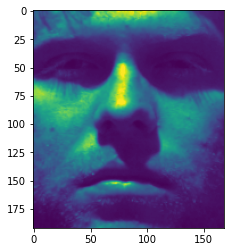

In [9]:
plt.imshow(yale_X[17].reshape(192,-1))

In [10]:
X_=MinMaxScaler().fit_transform(yale_X)

In [11]:
proportion_range=np.arange(0.1,0.36,0.05)
random_state_range=np.arange(7,8)
r_yale=experiments(X_,yale_y,proportion_range,random_state_range,gamma=1,
                k=1,
                dm=0.1,dc=10,γ=1,
                alpha=1,r=100
               )

kernelFDA i 0
kernelFDA i 1
kernelFDA i 2
kernelFDA i 3
kernelFDA i 4
kernelFDA i 5
KISSME i 0
KISSME i 1
KISSME i 2
KISSME i 3
KISSME i 4
KISSME i 5
BregmanProj i 0
BregmanProj i 1
BregmanProj i 2
BregmanProj i 3
BregmanProj i 4
BregmanProj i 5
SCMPI i 0
SCMPI i 1
SCMPI i 2
SCMPI i 3
SCMPI i 4
SCMPI i 5
ConsScalingProjLP i 0
ConsScalingProjLP i 1
ConsScalingProjLP i 2
ConsScalingProjLP i 3
ConsScalingProjLP i 4
ConsScalingProjLP i 5


# results evaluated by AMI

In [16]:
p_range=proportion_range
for criterion in arange(5):
        r=array(r_yale).mean(axis=3)[:,:,0].T
        criteria=['KmAmi','KmAri','WardAmi','WardAri','runtime']
        cat=criteria[criterion]
        r_df=pd.DataFrame(data=np.round(r,3), index=p_range,
                                         columns=['CSP_LP','Bregman','KernelFDA','SC_MPI','KISSME'])
r_df

,CSP_LP,Bregman,KernelFDA,SC_MPI,KISSME
0.10,0.149,0.100,0.003,0.184,0.150
0.15,0.242,0.099,0.018,0.276,0.242
0.20,0.329,0.123,0.010,0.327,0.328
0.25,0.410,0.174,0.018,0.409,0.410
0.30,0.477,0.198,0.005,0.478,0.484
0.35,0.556,0.233,0.006,0.563,0.556


# time cost

In [15]:
p_range=proportion_range
for criterion in arange(5):
        r=array(r_yale).mean(axis=3)[:,:,4].T
        criteria=['KmAmi','KmAri','WardAmi','WardAri','runtime']
        cat=criteria[criterion]
        r_df=pd.DataFrame(data=np.round(r,3), index=p_range,
                                         columns=['CSP_LP','Bregman','KernelFDA','SC_MPI','KISSME'])
r_df

,CSP_LP,Bregman,KernelFDA,SC_MPI,KISSME
0.10,2.199,26.022,15.009,6.076,2.494
0.15,2.599,30.113,18.732,5.018,2.641
0.20,3.072,29.509,14.893,4.083,2.620
0.25,2.834,33.804,18.845,3.161,2.594
0.30,2.682,38.556,18.683,2.772,2.700
0.35,2.876,35.010,17.820,2.233,3.002
